In [3]:
import pandas as pd
import numpy as np

In [ ]:
def classify_dataset(dataset):
    col_list = list(dataset.columns)
    data_types = dict(dataset.dtpyes)
    

In [4]:
df_test = pd.DataFrame(columns = ['a','b','c','d'],
                       data = [[1,'abc',2.1,5],[2,'bcd*',3.1,6],[3,'cd e',4.1,7]])

In [ ]:
"""
data type
----------
np.int64
"object"
np.float64
"""

In [ ]:
"""
------Correlation------
2D_density : float64, int64
Bubble : Object, float64, int64
Connected_Scatter : Object, float64, int64
Correlogram : Object, float64, int64
Heatmap : Object, float64, int64
Scatter : float64, int64

------Distribution------
Boxplot : float64, int64
Density : float64, int64
Histogram : float64, int64
Ridgeline : Object, float64, int64
Violin : Object, float64, int64

------Evolution------
Area : Object, float64, int64
Line : Object, float64, int64
Stacked : Object, float64, int64
Streamgraph : Object, float64, int64

------Flow------
Chord_Diagram : Object, int64
Network : Object
Sankey : Object, float64, int64

------Map------
Connection : Object, float64, int64
Map_Choropleth_Hexbin : Object, float64, int64

------Part Of A Whole------
Circular_Packing : depth with json
Dendrogram : float64, int64
Donut : float64, int64
Pie_Chart : float64, int64
Tree : float64, int64
Venn : float64, int64
"""

In [ ]:
# 워크래프트3에서는 챔피언(영웅)별로 스킬의 shortcut이 달랐다.
# 롤(League Of Legend)에서는 모든 챔피언의 스킬이 Q, W, E, R로 통일되어 있다.
# 따라서, 각각의 그래프가 사용하는 라이브러리(seaborn, plotly, matplotlib 등)가 각각 다르고,
# parameter들 또한 상이(pallete, cmap, color 등)하여, 하나로 통일시키고자하는 작업을 진행하고자 한다.

In [304]:
# ------Correlation------

def Density(dataset, x, y, cmap="Greens", bw_adjust=0.5, fill=True):
      import seaborn as sns
      import matplotlib.pyplot as plt
      
      sns.kdeplot(x=dataset[x], 
                  y=dataset[y], 
                  cmap=cmap, 
                  fill=fill, 
                  bw_adjust = bw_adjust)
      plt.show()

def Hist2D(x, y, bins=(50,50), cmap=None):
      import matplotlib.pyplot as plt
      if cmap ==None :
            cmap = plt.cm.jet
      else:
            cmap = cmap

      plt.hist2d(x, y, bins=bins, cmap=cmap)
      plt.show()

def Bubble(dataset, x, y, cmap="viridis", size="pop", hue="continent",edgecolors='black', sizes=(20, 2000)):
      import seaborn as sns
      import matplotlib.pyplot as plt

      sns.scatterplot(data=dataset, x=x, 
                y=y, 
                legend=False,
                palette=cmap,
                size = size,
                hue = hue,
                sizes = sizes,
                edgecolors=edgecolors)

      plt.show()

def Connected_Scatter(dataset, x, y, cmap='mediumvioletred',marker='o', alpha=.5):
      import matplotlib.pyplot as plt

      plt.plot(x,
            y,
            data=dataset,
            alpha=alpha,
            marker=marker,
            color=cmap)

      plt.show()

def pairplot(dataset, kind="reg", hue=None, cmap="Set2", markers = None, corner=True):
    import seaborn as sns

    sns.pairplot(dataset, 
                kind=kind, 
                hue=hue, 
                markers = markers,
                palette=cmap,
                corner=corner)
    plt.show()

def Heatmap(dataset, cmap="Greens", annot=True, annot_kws={"size":7}):
    
    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.heatmap(dataset, 
                cmap=cmap, 
                annot=annot, 
                annot_kws=annot_kws)
    plt.show()

def Scatterplot(dataset, x, y, fit_reg=False, x_thresh=None, y_thresh=None, lines = False):
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt

    if x_thresh == None:
        value = dataset[y] > y_thresh
    elif y_thresh == None:
        value = dataset[x] > x_thresh
    else:
        value=(dataset[x] > x_thresh) & (dataset[y] > y_thresh)

    dataset['color']= np.where(value==True , "#9b59b6", "green")

    sns.regplot(data=dataset, 
                x=x,
                y=y, 
                fit_reg=fit_reg, 
                scatter_kws={'facecolors':df['color']})

    # lines가 True일 때 x_thresh에 맞추어 선 그림
    if (lines == True) and (x_thresh != None) and (y_thresh != None):
        plt.vlines(x_thresh, 0, 1, color='r',linestyles='dashed')
        plt.hlines(y_thresh, 0, 1, color='r',linestyles='dashed')        
    elif (lines == True) and (x_thresh != None):
        plt.vlines(x_thresh, 0, 1, color='r',linestyles='dashed')
    elif (lines == True) and (y_thresh != None):
        plt.hlines(y_thresh, 0, 1, color='r',linestyles='dashed')
    else:
        pass
    plt.show()

def Joint_plot(dataset, x, y, bins=30, fill=True, kind='hex', cmap = 'gray') :
    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.jointplot(x=dataset[x], 
                y=dataset[y], 
                kind= kind, 
                color=cmap,
                marginal_kws=dict(bins=bins, fill=fill))

    plt.show()

    
# ------Distribution------

def Violin(dataset, species, target):
    import scipy.stats as st
    import matplotlib.pyplot as plt
    import numpy as np
    import random

    species_ = sorted(dataset[species].unique())
    y_data = [dataset[dataset[species] == specie][target].values for specie in species_]

    jitter = 0.04
    x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
    x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

    POSITIONS = list(range(len(species_)))
    COLOR_SCALE = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(species_))]

    print(COLOR_SCALE)

    BLACK = "#282724"
    GREY_DARK = "#747473"
    RED_DARK = "#850e00"

    fig, ax = plt.subplots(figsize= (14, 10))
    violins = ax.violinplot(
        y_data, 
        positions=POSITIONS,
        widths=0.45,
        bw_method="silverman",
        showmeans=False, 
        showmedians=False,
        showextrema=False
    )

    for pc in violins["bodies"]:
        pc.set_facecolor("none")
        pc.set_edgecolor(BLACK)
        pc.set_linewidth(1.4)
        pc.set_alpha(1)

    medianprops = dict(
        linewidth=4, 
        color=GREY_DARK,
        solid_capstyle="butt"
    )
    boxprops = dict(
        linewidth=2, 
        color=GREY_DARK
    )

    ax.boxplot(
        y_data,
        positions=POSITIONS, 
        showfliers = False, # 이상치 표시x
        showcaps = False,   # 캡표시x
        medianprops = medianprops,
        whiskerprops = boxprops,
        boxprops = boxprops
    )

    for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
        ax.scatter(x, y, s = 100, color=color, alpha=0.7)

    means = [y.mean() for y in y_data]
    for i, mean in enumerate(means):
        ax.scatter(i, mean, s=250, color=RED_DARK, zorder=3)

        ax.plot([i, i + 0.25], [mean, mean], ls="dashdot", color="black", zorder=3)
        
        ax.text(
            i + 0.25,
            mean,
            r"$\hat{\mu}_{\rm{mean}} = $" + str(round(mean, 2)),
            fontsize=13,
            va="center",
            bbox = dict(
                facecolor="white",
                edgecolor="black",
                boxstyle="round",
                pad=0.15 
            ),
            zorder=10 
        )


    xlabels = [f"{specie}\n(n={y_data[i].size})" for i, specie in enumerate(species_)]
    ax.set_xticks(POSITIONS)
    ax.set_xticklabels(xlabels, size=15, ha="center", ma="center")

    

In [279]:
df = sns.load_dataset('diamonds')

In [119]:
x = np.random.normal(size=50000)
y = x * 3 + np.random.normal(size=50000)

In [65]:
df = pd.DataFrame({
    'x_axis' : range(1,101),
    'y_axis':np.random.randn(100)*15+range(1,101),
    'z' : (np.random.randn(100)*15 + range(1,101))*2
})

In [171]:
df = pd.DataFrame(np.random.random((100,2)), 
                  columns=["x","y"])

In [328]:
def Violin(dataset, species, target):
    import scipy.stats as st
    import matplotlib.pyplot as plt
    import numpy as np
    import random

    species_ = sorted(dataset[species].unique())
    y_data = [dataset[dataset[species] == specie][target].values for specie in species_]

    jitter = 0.04
    x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
    x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

    POSITIONS = list(range(len(species_)))
    COLOR_SCALE = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(species_))]

    print(COLOR_SCALE)

    BLACK = "#282724"
    GREY_DARK = "#747473"
    RED_DARK = "#850e00"

    fig, ax = plt.subplots(figsize= (14, 10))
    violins = ax.violinplot(
        y_data, 
        positions=POSITIONS,
        widths=0.45,
        bw_method="silverman",
        showmeans=False, 
        showmedians=False,
        showextrema=False
    )

    for pc in violins["bodies"]:
        pc.set_facecolor("none")
        pc.set_edgecolor(BLACK)
        pc.set_linewidth(1.4)
        pc.set_alpha(1)

    medianprops = dict(
        linewidth=4, 
        color=GREY_DARK,
        solid_capstyle="butt"
    )
    boxprops = dict(
        linewidth=2, 
        color=GREY_DARK
    )

    ax.boxplot(
        y_data,
        positions=POSITIONS, 
        showfliers = False, # 이상치 표시x
        showcaps = False,   # 캡표시x
        medianprops = medianprops,
        whiskerprops = boxprops,
        boxprops = boxprops
    )

    for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
        ax.scatter(x, y, s = 100, color=color, alpha=0.7)

    means = [y.mean() for y in y_data]
    for i, mean in enumerate(means):
        ax.scatter(i, mean, s=250, color=RED_DARK, zorder=3)

        ax.plot([i, i + 0.25], [mean, mean], ls="dashdot", color="black", zorder=3)
        
        ax.text(
            i + 0.25,
            mean,
            r"$\hat{\mu}_{\rm{mean}} = $" + str(round(mean, 2)),
            fontsize=13,
            va="center",
            bbox = dict(
                facecolor="white",
                edgecolor="black",
                boxstyle="round",
                pad=0.15 
            ),
            zorder=10 
        )


    xlabels = [f"{specie}\n(n={y_data[i].size})" for i, specie in enumerate(species_)]
    ax.set_xticks(POSITIONS)
    ax.set_xticklabels(xlabels, size=15, ha="center", ma="center")

In [320]:
df = sns.load_dataset('diamonds')

In [321]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


['#1F643F', '#CF227C', '#FEB81B', '#B9E8F2', '#E11353']


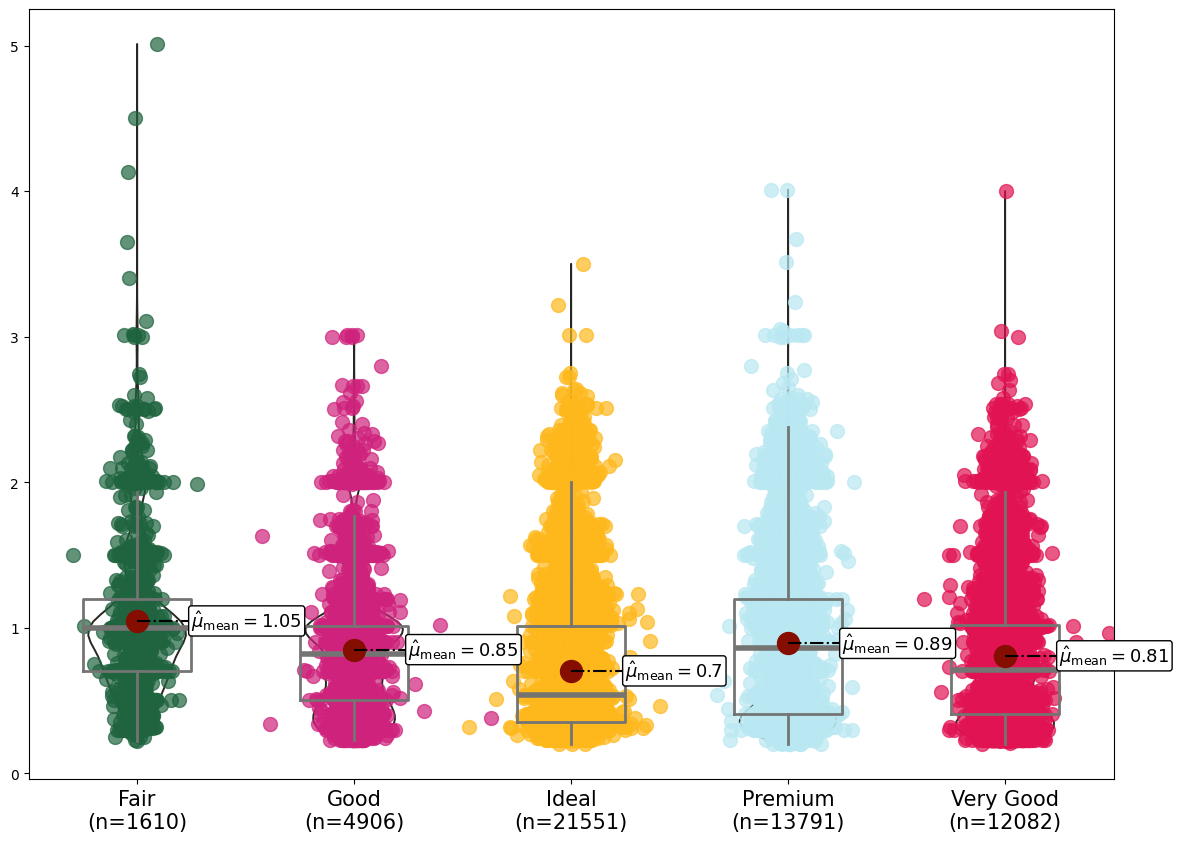

In [329]:
Violin(df, 'cut', 'carat')

In [327]:
species_ = ['a','b','c,','d','e','f','g','h']
["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(species_))]

['#2CF624',
 '#1F5948',
 '#CC02B4',
 '#32A9E4',
 '#036F7B',
 '#E3DCCD',
 '#313FD0',
 '#92A8FB']